<a href="https://colab.research.google.com/github/tguan6/DS4PH_2025/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0                 rawid              roi  volume   min    max  \
0           1  kirby127a_3_1_ax.img  Telencephalon_L  531111   0.0  374.0   
1           2  kirby127a_3_1_ax.img  Telencephalon_R  543404   0.0  300.0   
2           3  kirby127a_3_1_ax.img   Diencephalon_L    9683  15.0  295.0   
3           4  kirby127a_3_1_ax.img   Diencephalon_R    9678  10.0  335.0   
4           5  kirby127a_3_1_ax.img    Mesencephalon   10268  55.0  307.0   

       mean      std  type  level   id      icv      tbv  
0  128.3013  51.8593     1      1  127  1378295  1268519  
1  135.0683  53.6471     1      1  127  1378295  1268519  
2  193.5488  32.2733     1      1  127  1378295  1268519  
3  193.7051  32.7869     1      1  127  1378295  1268519  
4  230.8583  29.2249     1      1  127  1378295  1268519  


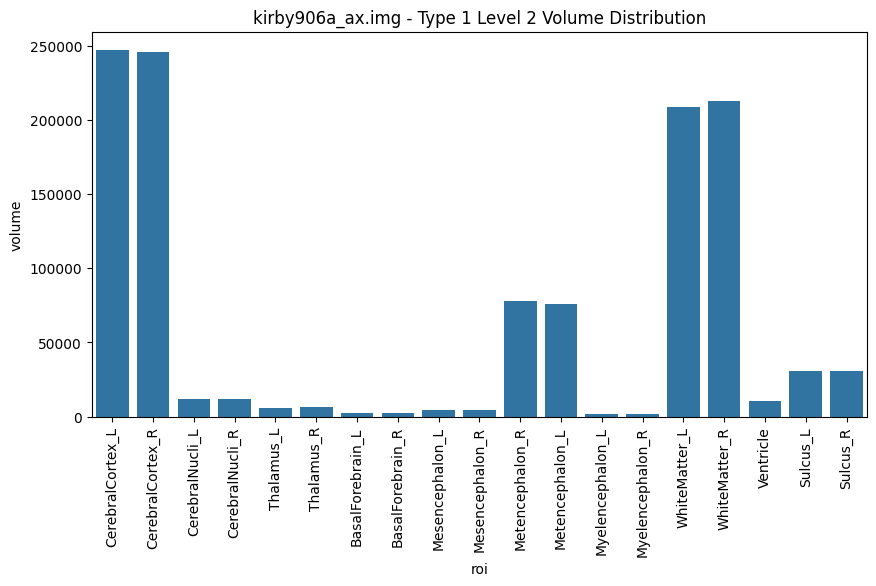

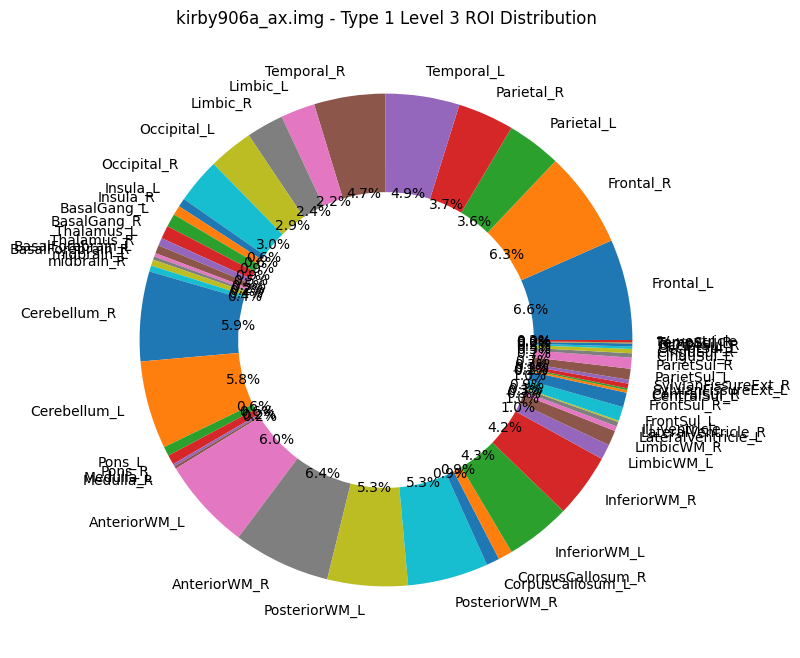

,Metric,Value
0,Telencephalon Left Volume,467063.000000
1,Telencephalon Right Volume,470488.000000
2,ICV Fraction,0.784552
3,TBV Fraction,0.834806


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

file_path = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"

kirby21_df = pd.read_csv(file_path)

print(kirby21_df.head())

subject_id = "kirby906a_ax.img"
subject_df = kirby21_df[kirby21_df["rawid"] == subject_id]

telencephalon_L_volume = subject_df[subject_df["roi"] == "Telencephalon_L"]["volume"].sum()
telencephalon_R_volume = subject_df[subject_df["roi"] == "Telencephalon_R"]["volume"].sum()

ICV = subject_df["icv"].iloc[0] if not subject_df["icv"].isna().all() else np.nan
TBV = subject_df["tbv"].iloc[0] if not subject_df["tbv"].isna().all() else np.nan

ICV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / ICV if ICV else np.nan
TBV_fraction = (telencephalon_L_volume + telencephalon_R_volume) / TBV if TBV else np.nan

type1_level2_df = subject_df[(subject_df["type"] == 1) & (subject_df["level"] == 2)]
if not type1_level2_df.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x="roi", y="volume", data=type1_level2_df)
    plt.xticks(rotation=90)
    plt.title(f"{subject_id} - Type 1 Level 2 Volume Distribution")
    plt.show()

type1_level3_df = subject_df[(subject_df["type"] == 1) & (subject_df["level"] == 3)]
if not type1_level3_df.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(
        type1_level3_df["volume"],
        labels=type1_level3_df["roi"],
        autopct='%1.1f%%',
        wedgeprops=dict(width=0.4)
    )
    plt.title(f"{subject_id} - Type 1 Level 3 ROI Distribution")
    plt.show()

computed_values = pd.DataFrame({
    "Metric": ["Telencephalon Left Volume", "Telencephalon Right Volume", "ICV Fraction", "TBV Fraction"],
    "Value": [telencephalon_L_volume, telencephalon_R_volume, ICV_fraction, TBV_fraction]
})

from IPython.display import display
display(computed_values)

       Year           Program
0  Master's               BME
1  Master's               BME
2    Senior               BME
3       PhD               BME
4       PhD  Computer_Science

Missing values in each column:
 Year       0
Program    0
dtype: int64

Data types of each column:
 Year       object
Program    object
dtype: object


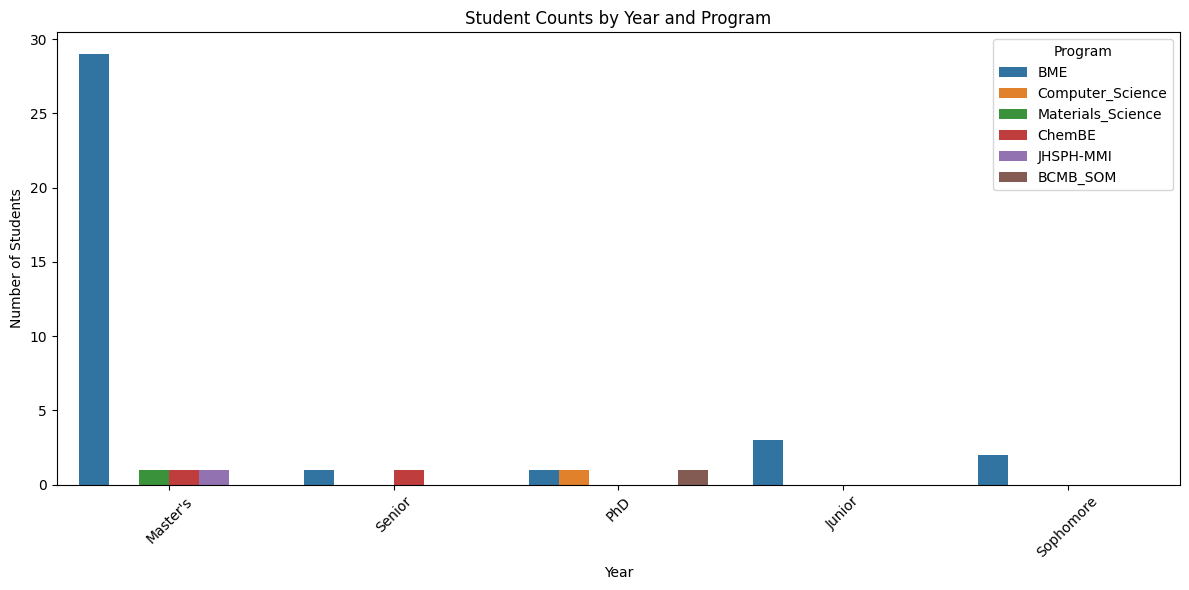

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

path = 'https://raw.githubusercontent.com/bcaffo/ds4bme/master/data/classInterests.txt'

class_interests_df = pd.read_csv(path, sep='\t')

print(class_interests_df.head())

print("\nMissing values in each column:\n", class_interests_df.isnull().sum())

print("\nData types of each column:\n", class_interests_df.dtypes)

plt.figure(figsize=(12, 6))
sns.countplot(data=class_interests_df, x='Year', hue='Program')
plt.title('Student Counts by Year and Program')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Program')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
import os
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/GSE5859_exprs.csv"

try:
    gene_expression_df = pd.read_csv(url, index_col=0)
except Exception as e:
    raise ValueError(f"Error reading CSV file: {e}")

gene_expression_df = gene_expression_df.apply(pd.to_numeric, errors="coerce")

if gene_expression_df.isna().sum().sum() > 0:
    print("Warning: NaN values detected in the dataset. Ensure all columns are numeric.")

gene_expression_df_pt1 = gene_expression_df.sub(gene_expression_df.mean(axis=1), axis=0)

gene_expression_df_pt2 = gene_expression_df_pt1.sub(gene_expression_df_pt1.mean(axis=0), axis=1)

std_dev = gene_expression_df_pt2.std(axis=0)
std_dev[std_dev == 0] = np.nan
gene_expression_df_pt3 = gene_expression_df_pt2.div(std_dev, axis=1)

print("Gene expression normalization completed successfully.")
print(gene_expression_df_pt3.head())

Gene expression normalization completed successfully.
           GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  \
1007_s_at        -0.062810        -1.694428         -0.797346   
1053_at           0.484259         0.835005          1.434085   
117_at            0.789673        -1.707110         -1.548943   
121_at           -1.599798        -1.460817         -0.134750   
1255_g_at         1.090032        -0.216675         -0.238137   

           GSM136707.CEL.gz  GSM25553.CEL.gz  GSM136676.CEL.gz  \
1007_s_at          0.362538        -1.152413          0.366177   
1053_at           -0.316432         0.141554         -0.076237   
117_at            -0.245036        -1.015618         -0.637799   
121_at             1.138467        -1.255766          1.368016   
1255_g_at          0.480868        -0.479461         -0.082265   

           GSM136711.CEL.gz  GSM136542.CEL.gz  GSM136535.CEL.gz  \
1007_s_at          1.252187         -0.054154          1.008166   
1053_at           -0.745

<ipython-input-20-91f4d342833f>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


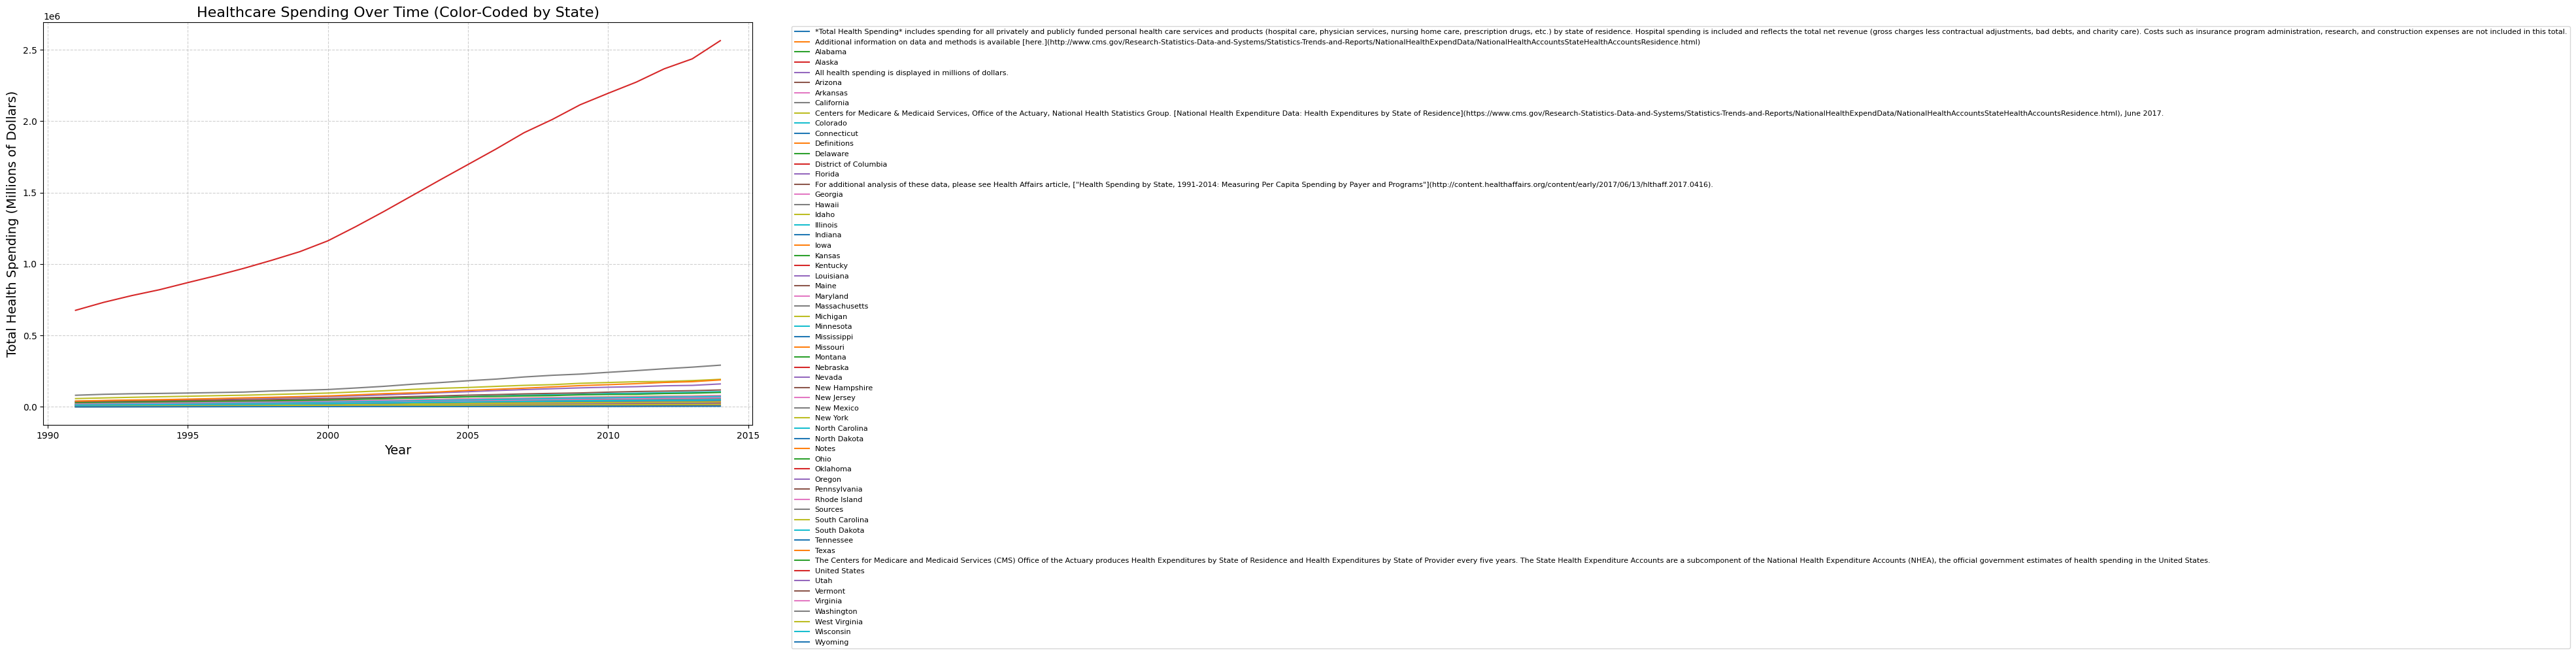

In [20]:
url1 = 'https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv'
healthcare_df = pd.read_csv(url1, skiprows=2)

healthcare_melted = healthcare_df.melt(id_vars=["Location"], var_name="Year", value_name="Spending")

healthcare_melted["Year"] = healthcare_melted["Year"].str.extract(r"(\d{4})").astype(int)

plt.figure(figsize=(14, 8))
for state, data in healthcare_melted.groupby("Location"):
    plt.plot(data["Year"], data["Spending"], label=state)

plt.title("Healthcare Spending Over Time (Color-Coded by State)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Health Spending (Millions of Dollars)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)  # Place legend outside the plot
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-21-2d3449de37da>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


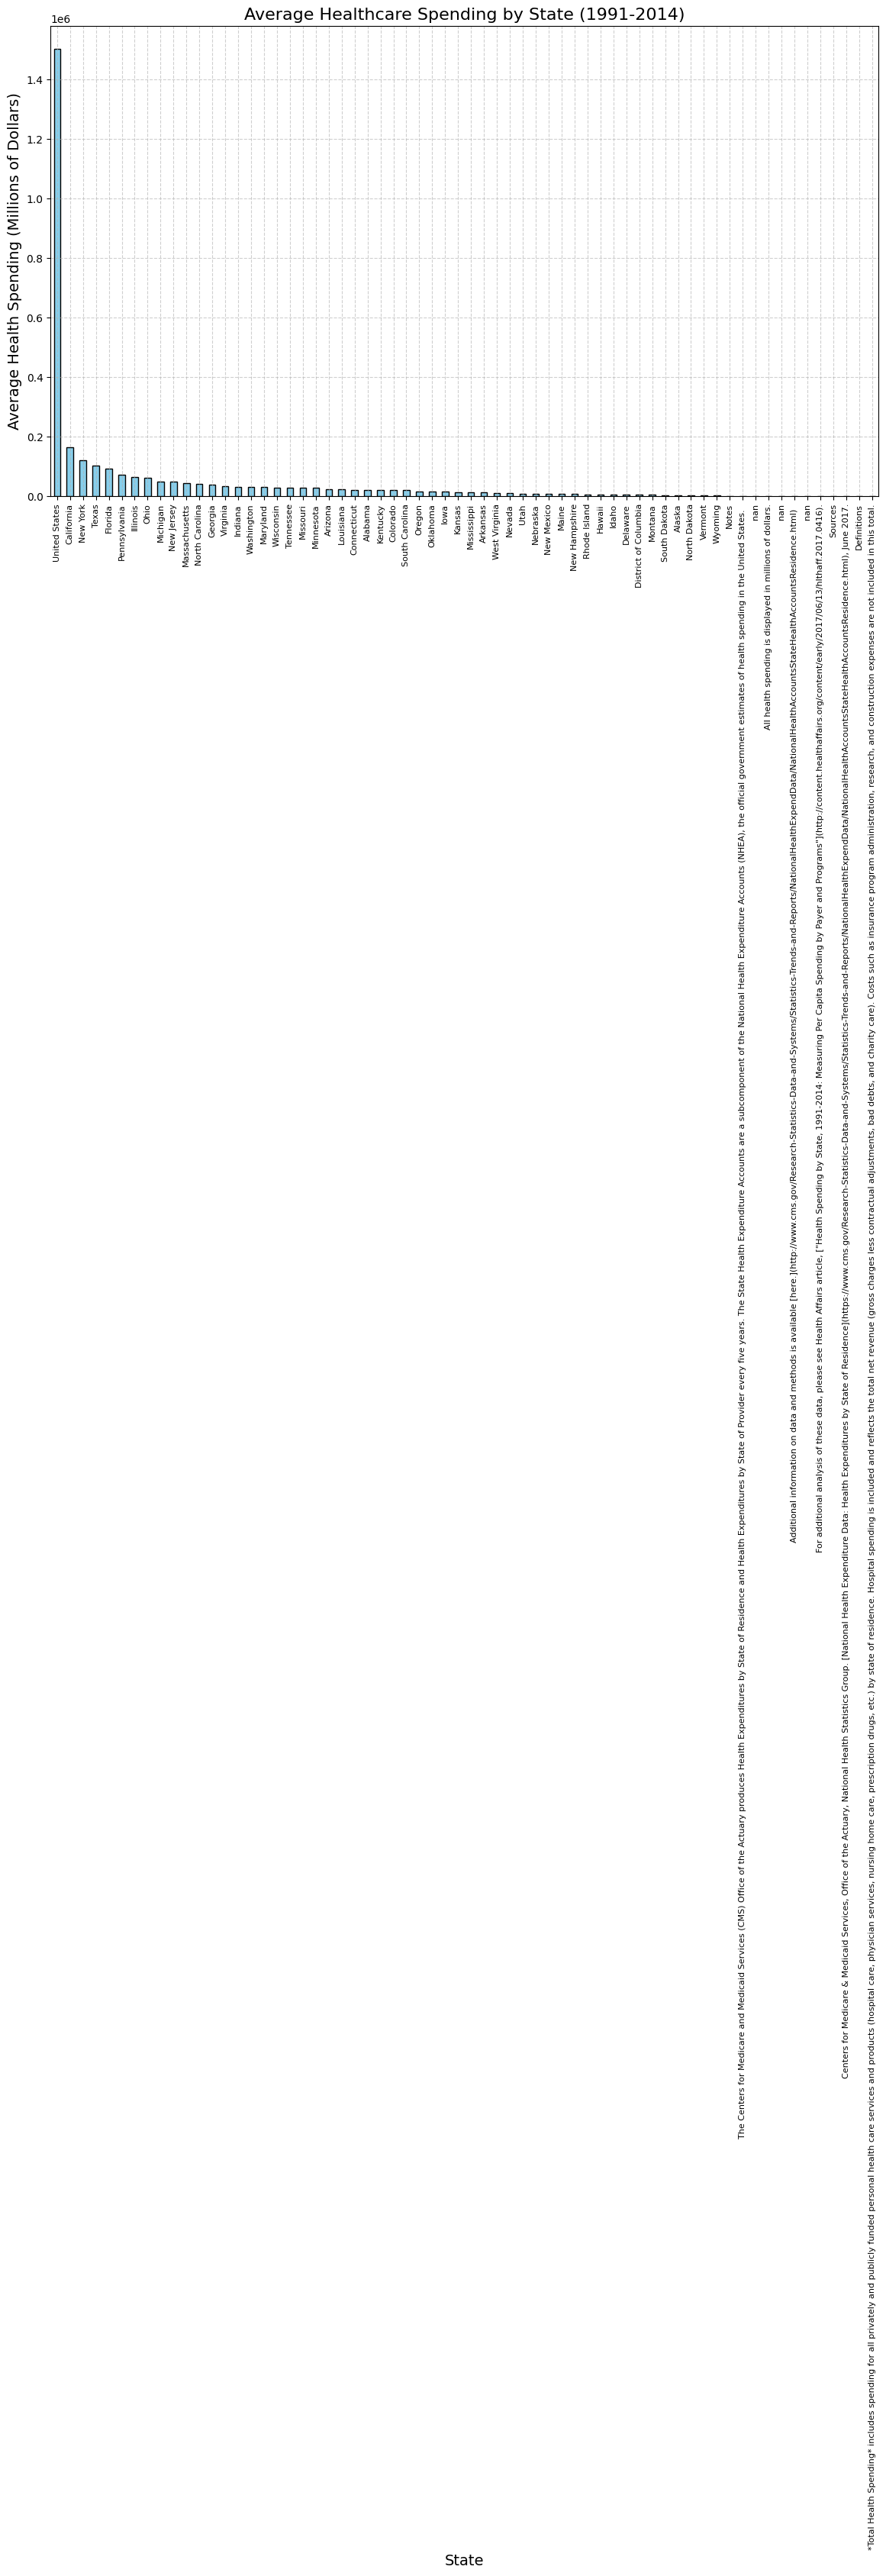

In [21]:
healthcare_df.set_index("Location", inplace=True)
healthcare_avg = healthcare_df.mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
healthcare_avg.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Average Healthcare Spending by State (1991-2014)", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Average Health Spending (Millions of Dollars)", fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()